# Tabela Fipe

### Objetivos deste Estudo

Exploração da taxa de depreciação de veículos
+ associação c/ inflação

- quero entender o lugar das grandes montadoras
    - numericamente, quais são, e quais as diferenças entre elas
- e das montadpras de luxo
- e de micro-montadoras, nacionais, etc

- entre elas existe uma grande diferença em depreciação, preços médios, etc e tals

- evolução do preço medio de venda de um veículo novo, atrelado à inflação

- evolução preço de venda novo

***Os dados estão beeem incompletos, preciso ver se um dos scripts de data scrapping @fipe funciona***

### Importação de Dados e Data Cleaning/Tidiyng

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
fipe = pd.read_csv("tabela-fipe-historico-precos.csv")

In [14]:
fipe.head()

,Unnamed: 0,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,0,038003-2,Acura,Integra GS 1.8,1992,11,2016,13041.0
1,1,038001-6,Acura,NSX 3.0,1995,3,2013,52339.0
2,2,038003-2,Acura,Integra GS 1.8,1992,3,2018,12423.0
3,3,038002-4,Acura,Legend 3.2/3.5,1998,5,2016,31067.0
4,4,038002-4,Acura,Legend 3.2/3.5,1998,2,2019,26381.0


In [15]:
fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466020 entries, 0 to 466019
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     466020 non-null  int64  
 1   codigoFipe     466020 non-null  object 
 2   marca          466020 non-null  object 
 3   modelo         466020 non-null  object 
 4   anoModelo      466020 non-null  int64  
 5   mesReferencia  466020 non-null  int64  
 6   anoReferencia  466020 non-null  int64  
 7   valor          466020 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 28.4+ MB


In [16]:
fipe.marca.nunique()

84

In [57]:
fipe.marca.unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'Asia Motors', 'ASTON MARTIN',
       'Audi', 'Baby', 'BMW', 'BRM', 'Bugre', 'BYD', 'Cadillac',
       'Caoa Chery', 'CHANA', 'CHANGAN', 'Chrysler', 'Citroën',
       'Cross Lander', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa',
       'Envemo', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'Fyber', 'GEELY',
       'GM - Chevrolet', 'GREAT WALL', 'Gurgel', 'HAFEI',
       'HITECH ELECTRIC', 'Honda', 'Hyundai', 'Isuzu', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'Kia Motors', 'Lada', 'LAMBORGHINI',
       'Land Rover', 'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra',
       'Maserati', 'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz',
       'Mercury', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'RELY', 'Renault',
       'Rolls-Royce', 'Rover', 'Saab', 'Saturn', 'Seat', 'SHINERAY',
       'smart', 'SSANGYONG', 'Subaru', 'Suzuki', 'Toyota', 'Troller',
       'Volvo', 'VW - VolksWagen', 'Wake', 'Walk'], dt

In [58]:
# modelos diferentes
fipe.codigoFipe.nunique()

5283

In [60]:
fipe.modelo.nunique()

5366

existem mais `modelo` do que `codigosFipe` indicando que é possível q modelos diferentes compartilhem o mesmo código, ou q um mesmo modelo/código tenha diversas nomeclaturas de modelos

In [20]:
fipe.anoReferencia.value_counts()

2021    47957
2020    45805
2019    43296
2018    40468
2022    35475
2017    32878
2016    26664
2015    21424
2014    19822
2013    17823
2012    16519
2011    14961
2009    14361
2010    14032
2008    13328
2007    11001
2006    10200
2005     9468
2004     8507
2003     7965
2002     7394
2001     6672
Name: anoReferencia, dtype: int64

In [21]:
# constituição dos anoModelos dos veículso incluídos no dataset
fipe.anoModelo.value_counts()

2022    114871
2001     32423
1995     31223
2000     21392
1999     17806
2012     13954
2015     13580
1997     13454
2003     13428
2002     13388
1998     12663
2014     12532
2016     11943
2006     11248
2009     10980
2013     10436
2007     10198
1996     10098
2004      9968
2011      9965
2017      9317
2010      9263
2008      8734
2005      8462
2018      8209
1994      7362
2019      5922
1993      5395
2020      2782
1992      2240
1986      1124
2021       818
1991       480
1989       141
1987        88
1988        66
1990        62
1985         4
2023         1
Name: anoModelo, dtype: int64

### Data Cleaning/Tidying

- `'Unnamed: 0'` : drop [x]
- `'codigoFipe'` : rename to id
- `'marca'` 
    - verificar se há problemas [x]
- `'modelo'`
    - identificar discrepância em qtd de ids e modelos únicos
- `'anoModelo'`
    - Muitos modelos estão incorretamente identificados como 2022, criar uma flag p/ identificar isso [x]
- `'mesReferencia'` & `'anoReferencia'`
    - Juntar em um `mesAnoRef` datetime type [x]
- `'valor'`

In [22]:
fipe.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
# verificar se tem alguma marca duplicada/ algum problema
fipe.marca.unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'Asia Motors', 'ASTON MARTIN',
       'Audi', 'Baby', 'BMW', 'BRM', 'Bugre', 'BYD', 'Cadillac',
       'Caoa Chery', 'CHANA', 'CHANGAN', 'Chrysler', 'Citroën',
       'Cross Lander', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa',
       'Envemo', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'Fyber', 'GEELY',
       'GM - Chevrolet', 'GREAT WALL', 'Gurgel', 'HAFEI',
       'HITECH ELECTRIC', 'Honda', 'Hyundai', 'Isuzu', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'Kia Motors', 'Lada', 'LAMBORGHINI',
       'Land Rover', 'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra',
       'Maserati', 'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz',
       'Mercury', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'RELY', 'Renault',
       'Rolls-Royce', 'Rover', 'Saab', 'Saturn', 'Seat', 'SHINERAY',
       'smart', 'SSANGYONG', 'Subaru', 'Suzuki', 'Toyota', 'Troller',
       'Volvo', 'VW - VolksWagen', 'Wake', 'Walk'], dt

In [61]:
fipe.codigoFipe.nunique()

5283

In [24]:
fipe.modelo.nunique()

5366

*o numero de modelos é demasiado grande para se verificar individualmente se há modelso duplicados/com erros, além de ser necessário ter um conhecimento aprofundado do catálogo de cada fabricante/ano para que se possa identificar estes erros.*

In [25]:
fipe.mesReferencia.astype(str) + ", " + fipe.anoReferencia.astype(str)

0         11, 2016
1          3, 2013
2          3, 2018
3          5, 2016
4          2, 2019
            ...   
466015     2, 2015
466016     6, 2006
466017     8, 2016
466018     7, 2007
466019     4, 2009
Length: 466020, dtype: object

In [26]:
fipe["mesAnoRef"] = pd.to_datetime((fipe.mesReferencia.astype(str) + ", " + fipe.anoReferencia.astype(str)), infer_datetime_format=True)
fipe.drop(columns=["mesReferencia", "anoReferencia"], inplace=True)

In [27]:
fipe.head()

,codigoFipe,marca,modelo,anoModelo,valor,mesAnoRef
0,038003-2,Acura,Integra GS 1.8,1992,13041.0,2016-11-01
1,038001-6,Acura,NSX 3.0,1995,52339.0,2013-03-01
2,038003-2,Acura,Integra GS 1.8,1992,12423.0,2018-03-01
3,038002-4,Acura,Legend 3.2/3.5,1998,31067.0,2016-05-01
4,038002-4,Acura,Legend 3.2/3.5,1998,26381.0,2019-02-01


Cria uma flag `anoMod_flag` p/ veículos q estão com os dados de `anoModelo` incorretos (isto é, `anoModelo` posterior ao primeiro `anoReferencia` por uma diferença maior do que um ano)

*Veículos podem ser vendidos com Ano-Modelo do ano seguinte, no entanto não é possível/provável que um veículo vendido em 2020 tenha como Ano-Modelo 2022. Esta não é uma maneira 100% precisa de identificar/excluir os dados incorretos, mas é suficiente para diminuir o impacto nos dados e calculos*

In [28]:
anoMod_fix = fipe[fipe.anoModelo == 2022].groupby("codigoFipe").min()
fipe["anoMod_flag"] = 0
fipe.anoMod_flag[(fipe.codigoFipe.isin(anoMod_fix[anoMod_fix.mesAnoRef.dt.year < 2021].index))&(fipe.anoModelo == 2022)] = 1

## EDA

### Constituição do Dataset

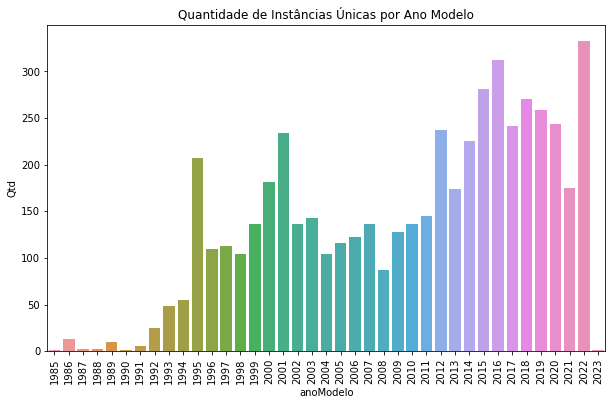

In [123]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.barplot(x = fipe[fipe.anoMod_flag == 0].groupby("anoModelo").nunique().index, 
y = fipe[fipe.anoMod_flag == 0].groupby("anoModelo").nunique().codigoFipe)
plt.title("Quantidade de Instâncias Únicas por Ano Modelo");
plt.ylabel("Qtd");

### Marcas

In [63]:
marcas = fipe[["marca", "anoModelo", "valor"]].groupby("marca").describe()
marcas2 = fipe[["marca", "anoModelo", "valor"]][fipe.anoMod_flag == 0].groupby("marca").describe()

**Marcas mais antigas no mercado**

In [114]:
# Marcas mas antigas no mercado
marcas.anoModelo[["min","mean", "max"]].sort_values("min").head(15)

,min,mean,max
marca,,,
Fiat,1985.0,2010.403361,2022.0
Ford,1986.0,2006.067476,2022.0
Alfa Romeo,1986.0,2000.028851,2022.0
VW - VolksWagen,1986.0,2010.005966,2022.0
Engesa,1989.0,1993.826923,1994.0
Dodge,1989.0,2003.501271,2022.0
GM - Chevrolet,1989.0,2005.622340,2022.0
Mercedes-Benz,1992.0,2010.839662,2022.0
Toyota,1992.0,2009.928402,2022.0


**Marcas mais novas no mercado**

In [113]:
# Marcas mais novas no mercado
marcas2.anoModelo[["min","mean", "max"]].sort_values("min", ascending = False).head(10)

,min,mean,max
marca,,,
RAM,2022.0,2022.000000,2022.0
BYD,2022.0,2022.000000,2022.0
HITECH ELECTRIC,2020.0,2020.000000,2020.0
Mclaren,2019.0,2020.042105,2022.0
BRM,2019.0,2019.157895,2023.0
Fibravan,2015.0,2015.900000,2017.0
GEELY,2014.0,2014.500000,2015.0
RELY,2014.0,2014.190661,2015.0
Rolls-Royce,2013.0,2016.891509,2022.0


**Marcas que saíram do mercado há mais tempo**

In [109]:
# Marcas mas antigas no mercado
marcas2.anoModelo[["min","mean", "max"]].sort_values("max").head(20)

,min,mean,max
marca,,,
Saturn,1992.0,1992.000000,1992.0
Saab,1993.0,1993.000000,1993.0
Engesa,1989.0,1993.826923,1994.0
Rover,1993.0,1994.590734,1995.0
Plymouth,1993.0,1993.901544,1995.0
Gurgel,1993.0,1993.535934,1995.0
Lotus,1995.0,1995.000000,1995.0
Pontiac,1992.0,1993.418919,1995.0
Mercury,1993.0,1994.000000,1995.0


**Marcas mais caras**

In [98]:
marcas[[("valor", "min"),("valor", "mean"), ("valor", "max"), ("anoModelo", "mean")]].sort_values(
    ("valor","mean"), ascending=False).head(20)

valor                             anoModelo
                       min          mean        max         mean
marca                                                           
Rolls-Royce      1549464.0  3.719300e+06  7706492.0  2019.724790
Mclaren          1489850.0  2.814184e+06  6695887.0  2021.462428
LAMBORGHINI       660436.0  2.290423e+06  8233652.0  2017.786355
Ferrari           123880.0  1.033706e+06  8407082.0  2006.521322
ASTON MARTIN      315323.0  9.336595e+05  2704368.0  2015.698816
Porsche            46204.0  4.979568e+05  3452120.0  2014.651856
Maserati           26571.0  4.501664e+05  2802360.0  2008.124189
RAM               399900.0  4.419327e+05   483113.0  2022.000000
BYD               259990.0  4.286623e+05   540000.0  2022.000000
Land Rover         20686.0  3.408345e+05  1499950.0  2015.763074
Jaguar             33843.0  2.550838e+05   882705.0  2012.126406
Mercedes-Benz       8715.0  2.413507e+05  5998562.0  2010.839662
BMW                13986.0  2.372719e+05  1310202.0  2011.162055
Lexus              21504.0  1.910596e+05   986309.0  2012.135735
MINI               41228.0  1.457375e+05   380241.0  2016.636587
Audi               11951.0  1.430889e+05  1831510.0  2008.790496
LOBINI             80421.0  1.119500e+05   187500.0  2010.784946
Agrale             74153.0  1.072780e+05   121140.0  2021.397321
HITECH ELECTRIC    76801.0  1.059260e+05   147600.0  2021.695238
Jeep               11954.0  1.022728e+05   487490.0  2011.522193

*Marcas que entraram no mercado recentemente e tem Ano-modelo médio mais recente tendem a estar entre aquelas com valor médio maior, por consequência de que carros novos tendem a ter valor mais alto de mercado*

In [104]:
marcas[[("valor", "min"),("valor", "mean"), ("valor", "max"), ("anoModelo", "min")]][
    marcas[("anoModelo", "min")] < 2021].sort_values(("valor","mean"), ascending=False).head(20)

valor                          anoModelo
                       min          mean        max       min
marca                                                        
Rolls-Royce      1549464.0  3.719300e+06  7706492.0    2013.0
Mclaren          1489850.0  2.814184e+06  6695887.0    2019.0
LAMBORGHINI       660436.0  2.290423e+06  8233652.0    2010.0
Ferrari           123880.0  1.033706e+06  8407082.0    1994.0
ASTON MARTIN      315323.0  9.336595e+05  2704368.0    2011.0
Porsche            46204.0  4.979568e+05  3452120.0    1995.0
Maserati           26571.0  4.501664e+05  2802360.0    1994.0
Land Rover         20686.0  3.408345e+05  1499950.0    1997.0
Jaguar             33843.0  2.550838e+05   882705.0    1995.0
Mercedes-Benz       8715.0  2.413507e+05  5998562.0    1992.0
BMW                13986.0  2.372719e+05  1310202.0    1992.0
Lexus              21504.0  1.910596e+05   986309.0    1995.0
MINI               41228.0  1.457375e+05   380241.0    2012.0
Audi               11951.0  1.430889e+05  1831510.0    1995.0
LOBINI             80421.0  1.119500e+05   187500.0    2008.0
Agrale             74153.0  1.072780e+05   121140.0    2007.0
HITECH ELECTRIC    76801.0  1.059260e+05   147600.0    2020.0
Jeep               11954.0  1.022728e+05   487490.0    1993.0
Volvo               5671.0  9.520918e+04   573745.0    1993.0
MG                 52351.0  8.293432e+04   118374.0    2012.0

*Com isso podemos eliminar o efeito de marcas recém chegadas no mercado que só contabilizam veículos novos*

**Marcas mais baratas (ainda em no mercado)**

In [110]:
marcas2[[("valor", "min"),("valor", "mean"), ("valor", "max"), ("anoModelo", "max"), 
("anoModelo", "mean")]][marcas2[("anoModelo", "max")] > 2002].sort_values(("valor","mean")).head(20)


valor                         anoModelo             
                min          mean       max       max         mean
marca                                                             
Bugre       10156.0  12655.662252   15003.0    2008.0  2008.000000
Seat         4268.0  13296.766890   25941.0    2003.0  2000.359464
CHANA       11665.0  18532.227194   26274.0    2012.0  2010.502582
HAFEI       14423.0  19472.457560   26151.0    2013.0  2012.216180
EFFA        12045.0  19819.238095   45325.0    2019.0  2012.259740
CHANGAN     15800.0  20781.729391   26595.0    2012.0  2012.000000
Peugeot      3264.0  23515.564934  329666.0    2022.0  2004.015309
Renault      4079.0  24158.584253  210490.0    2022.0  2006.261633
LIFAN       15500.0  25837.071672   66209.0    2019.0  2013.447099
GEELY       20903.0  27213.367925   34962.0    2015.0  2014.500000
Suzuki       3618.0  28394.184063  163509.0    2021.0  2001.789504
SHINERAY    21672.0  28401.883333   40446.0    2015.0  2014.891667
RELY        22094.0  28594.988327   38863.0    2015.0  2014.190661
Ford         2698.0  29065.377132  590167.0    2022.0  2003.700149
Walk        22597.0  29451.243590   45645.0    2019.0  2013.051282
Alfa Romeo   3278.0  30268.745612  138722.0    2005.0  1998.457427
Honda        9498.0  31937.383389  322464.0    2022.0  2002.738687
Citroën      2983.0  32363.683221  330278.0    2022.0  2009.094287
Fibravan    28362.0  32802.483333   39983.0    2017.0  2015.900000
Nissan       3612.0  33498.847992  958027.0    2022.0  2003.962846

### Modelos Individuais

In [125]:
modelos = fipe.groupby("codigoFipe")

**Modelos mais caros a venda no Brasil**

In [126]:
modelos.max().sort_values("valor", ascending=False).head(20)

,marca,modelo,anoModelo,valor,mesAnoRef,anoMod_flag
codigoFipe,,,,,,
031053-0,Ferrari,SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido),2022,8407082.0,2022-08-01,0
078020-0,LAMBORGHINI,AVENTADOR 770-4 SVJ ROADSTER V12,2022,8233652.0,2022-08-01,0
078017-0,LAMBORGHINI,AVENTADOR LP 770-4 SVJ,2022,8206914.0,2022-08-01,1
087007-2,Rolls-Royce,CullinanBlack Badged 6.7 V12 Aut.,2022,7706492.0,2022-08-01,0
031049-2,Ferrari,SF 90 STRADALE 4.0 V8 Bi-Turbo (Híbrido),2022,7406252.0,2022-08-01,0
087008-0,Rolls-Royce,Ghost 6.7 V12 Aut.,2022,7224710.0,2022-08-01,0
031050-6,Ferrari,812 GTS 6.5 V12 800cv,2022,6923680.0,2022-08-01,0
090009-5,Mclaren,765LT Coupe 4.0 Bi-Turbo V8,2022,6695887.0,2022-08-01,0
087002-1,Rolls-Royce,Phantom 6.7 V12 Aut.,2022,6400000.0,2022-08-01,1


*Uma coisa interessante de notar, é que muito deles tem a flag de Ano-Modelo incorreto ativa, indicando que os bilionários brasileiros não se importam tanto se seus super esportivos são semi-novos*

**Carros Mais Antigos da Tabela**

In [128]:
modelos.min().sort_values("anoModelo").head(20)

,marca,modelo,anoModelo,valor,mesAnoRef,anoMod_flag
codigoFipe,,,,,,
001105-3,Fiat,Oggi,1985,3285.0,2022-05-01,0
003187-9,Ford,F-100 CD 2.3,1986,7393.0,2016-01-01,0
001116-9,Fiat,Panorama C/CL,1986,2404.0,2022-06-01,0
005102-0,VW - VolksWagen,Santana CS/CD/CG,1986,4613.0,2017-07-01,0
003020-1,Ford,Belina L 1.8/ 1.6,1986,2825.0,2016-01-01,0
003021-0,Ford,Belina GL 1.8 / 1.6,1986,3720.0,2016-01-01,0
003189-5,Ford,F-100 Super Série 2.3,1986,7950.0,2016-01-01,0
003173-9,Ford,Furglaine 3.6,1986,6532.0,2016-02-01,0
006013-5,Alfa Romeo,2300 TI/TI-4,1986,3278.0,2001-01-01,0


*É interessante notar que entre estes modelos mais antigos, a primeira cotação de muitos é de uma data relativamente recente. Existem duas hipoteses para explicar este dado:*
- A compra/venda destes modelos não estava sendo considerada/incluída no dataset
- Estes modelos estão reentrando o mercado como antíguidades

In [134]:
# modelos mais baratos na cotação atual
fipe[fipe.mesAnoRef == fipe.mesAnoRef.max()].sort_values("valor").head(20)

,codigoFipe,marca,modelo,anoModelo,valor,mesAnoRef,anoMod_flag
183785,019005-5,Lada,Laika 1.5,1992,2188.0,2022-08-01,0
92611,001116-9,Fiat,Panorama C/CL,1986,2404.0,2022-08-01,0
92652,001138-0,Fiat,147 Furgão (todos),1987,2642.0,2022-08-01,0
118369,003020-1,Ford,Belina L 1.8/ 1.6,1986,3176.0,2022-08-01,0
92270,001105-3,Fiat,Oggi,1985,3285.0,2022-08-01,0
74366,012014-6,Daihatsu,Move Van,1997,3322.0,2022-08-01,0
66740,011002-7,Citroën,BX 1.6S 16V,1993,3355.0,2022-08-01,0
107086,003129-1,Ford,Corcel II GL/GT,1986,3386.0,2022-08-01,0
92859,001128-2,Fiat,Cinquecento 0.7,1995,3619.0,2022-08-01,0
115725,003128-3,Ford,Corcel II L,1986,3636.0,2022-08-01,0


### Tabela Preço Novo

In [190]:
precoNovo = fipe[((fipe.anoModelo == fipe.mesAnoRef.dt.year) | 
    (fipe.anoModelo == (fipe.mesAnoRef.dt.year + 1))) & 
        (fipe.anoMod_flag == 0)].groupby("codigoFipe").max()

In [191]:
precoNovo.anoModelo.value_counts()

2022    333
2019     62
2020     31
2021     20
2017     10
2018      3
2014      2
2016      1
2023      1
Name: anoModelo, dtype: int64

In [192]:
precoNovo.groupby("anoModelo").mean()

,valor,anoMod_flag
anoModelo,,
2014,77965.000000,0
2016,78188.000000,0
2017,50591.700000,0
2018,69775.333333,0
2019,80101.370968,0
2020,89626.322581,0
2021,365343.500000,0
2022,596197.219219,0
2023,83377.000000,0


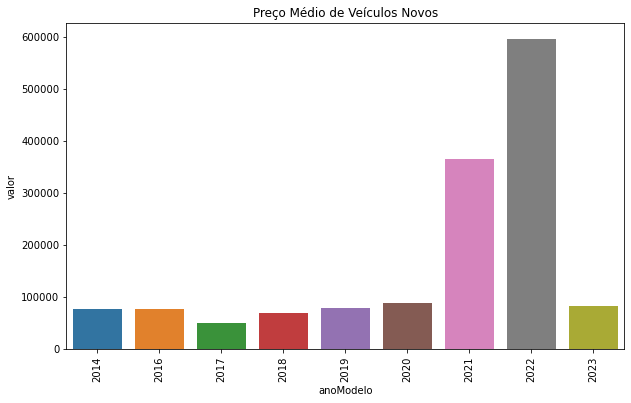

In [193]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.barplot(x = precoNovo.groupby("anoModelo").mean().index, 
y = precoNovo.groupby("anoModelo").mean().valor)
plt.title("Preço Médio de Veículos Novos");

In [195]:
fipe[fipe.codigoFipe == "031052-2"]

,codigoFipe,marca,modelo,anoModelo,valor,mesAnoRef,anoMod_flag
87603,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3500000.0,2022-06-01,0
88669,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3500000.0,2022-08-01,0
88777,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3504515.0,2022-05-01,0
88954,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3518784.0,2022-02-01,0
90171,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3502951.0,2022-07-01,0
90348,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3515236.0,2022-01-01,0
90750,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3587507.0,2021-12-01,0
91010,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3500000.0,2022-03-01,0
91099,031052-2,Ferrari,PORTOFINO M 3.9 V8 620cv,2022,3502951.0,2022-04-01,0


***O que caralho está acontecendo?????***

### Preço Medio por Ano Modelo

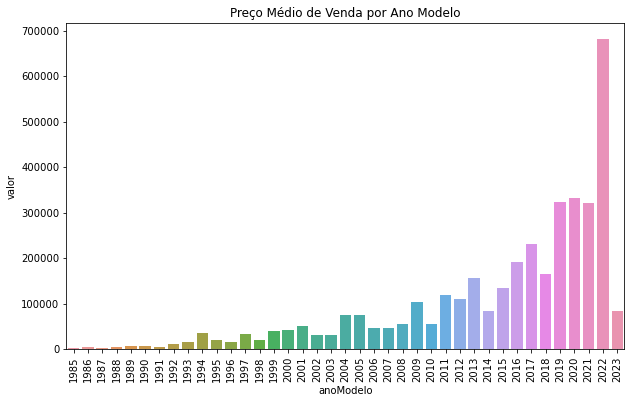

In [54]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.barplot(x = fipe[fipe.anoMod_flag == 0].groupby("anoModelo").mean().index, 
y = fipe[fipe.anoMod_flag == 0].groupby("anoModelo").mean().valor)
plt.title("Preço Médio de Venda por Ano Modelo");

Text(0.5, 1.0, 'Preço Médio de Venda por Ano Modelo - não corrigido p/ Ano-Modelo c/ Erros')

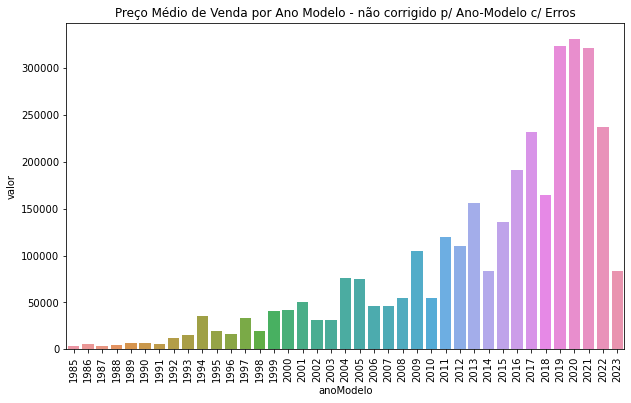

In [51]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.barplot(x = fipe.groupby("anoModelo").mean().index, 
y = fipe.groupby("anoModelo").mean().valor)
plt.title("Preço Médio de Venda por Ano Modelo - não corrigido p/ Ano-Modelo c/ Erros");

qual o preço máximo de venda por ano modelo?

Como de se esperar, automóveis mais recentes apresentam valores médios de venda maiores.

Vale notar que p/ ano modelo  2023, a quantidade reduzida de instâncias de venda afeta o valor apresentado

Outro ponto é que há uma quantidade de veículos ano 2022 muito superior aos outros anos, por que isso ocorre? 

> Muitos modelos s/ anoModelo definido são considerados ano 2022

### Preço Médio de Venda por Marcas

In [32]:
# Marcas com maior preço de venda médio
fipe.groupby("marca").mean().sort_values("valor", ascending=False).head(20)

,anoModelo,valor,anoMod_flag
marca,,,
Rolls-Royce,2019.724790,3.719300e+06,0.554622
Mclaren,2021.462428,2.814184e+06,0.725434
LAMBORGHINI,2017.786355,2.290423e+06,0.462597
Ferrari,2006.521322,1.033706e+06,0.193097
ASTON MARTIN,2015.698816,9.336595e+05,0.292724
Porsche,2014.651856,4.979568e+05,0.456036
Maserati,2008.124189,4.501664e+05,0.186284
RAM,2022.000000,4.419327e+05,0.000000
BYD,2022.000000,4.286623e+05,0.000000


In [33]:
# Marcas com menor preço de venda médio
fipe.groupby("marca").mean().sort_values("valor", ascending=False).tail(20)

,anoModelo,valor,anoMod_flag
marca,,,
Troller,1999.666667,29814.134921,0.000000
EFFA,2017.182013,27702.902034,0.505353
Rover,1994.590734,26060.667954,0.000000
Envemo,1996.000000,25238.811538,0.000000
CHANGAN,2014.619048,23009.806878,0.261905
HAFEI,2015.888152,22667.648716,0.375311
Bugre,2015.854651,22493.543605,0.561047
Mazda,1998.357143,22187.709118,0.034884
CHANA,2014.618785,22137.691713,0.358011


É interessante notar como entre as marcas mais "valiosas" existem algumas que são aparentemente mias recentes no mercado (anoModelo médio > 2020) como:
- **McLaren** - Marca de Carros Esportivos, no mercado desde 2019
- **RAM** - Submarca de Caminhonetes, 1 unico modelo lançado em 2022
- **BYD** - Marca Chinesa de Carros Elétricos, 4 modelos em 2022
    - **Agrale** - Marca Gaucha de Tratores/Caminhões e Utilitários, ***anoModelo Incorretos!!!***
- **Hitech Electric** - Marca Paranaense de Utilitários elétricos

De maneira contrária, entre as marcas menos valorizadas, a maioria constitui marcas mais antigas ( < 2000), com algumas exceções de marcas mais novas, como:
- **EFFA** - Marca de VUCs Uruguaia
- **CHANGAN** - Marca Chinesa de Carros Elétricos (?), novo nome da marca Chana
- **HAFEI** - Marca de VUCs Chinesa
- **Bugre** - Marca de Buguies Carioca, ***anoModelo Incorreto!!!***
- **CHANA** - Marca Chinesa

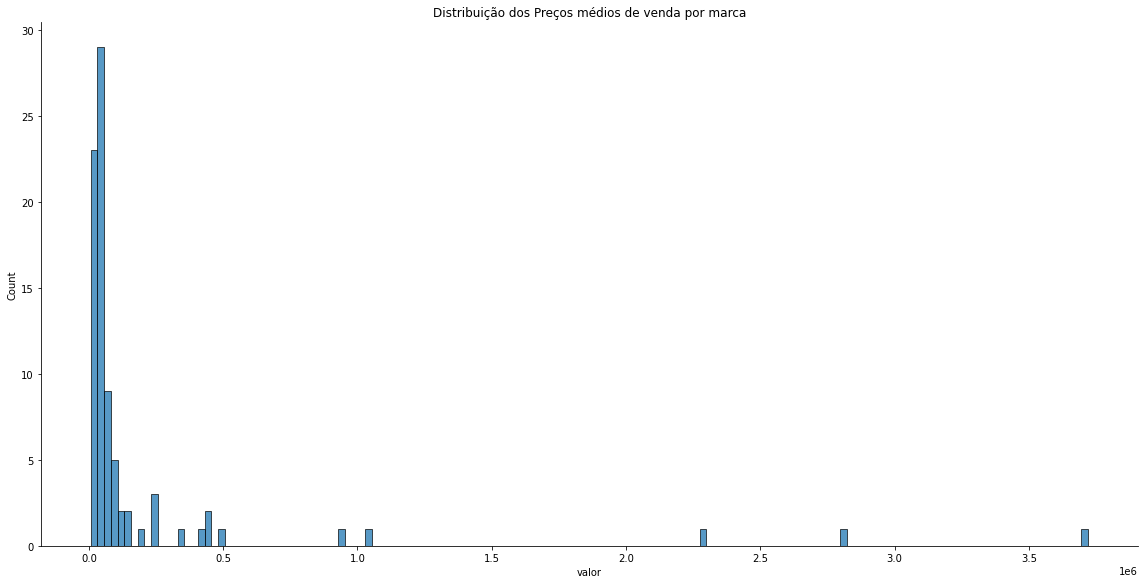

In [55]:
# plt.figure(figsize=(12,8))
sns.displot(fipe.groupby("marca").mean().valor, height= 8, aspect= 2)
plt.title("Distribuição dos Preços médios de venda por marca");

Notamos que algumas poucas marcas possuem valores médios de venda considerávelmente maior do que 95% das marcas
Tais marcas são:
- *Rolls-Roice*
- *McLaren*
- *Lamborghini*
- *Ferrari*
- *Aston Martin*

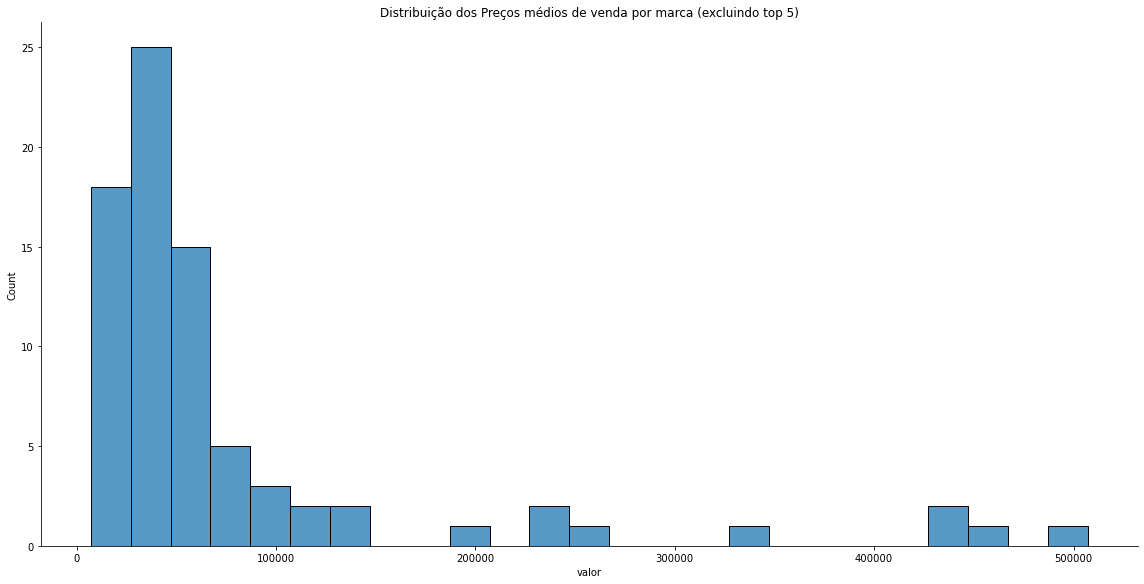

In [56]:
# plt.figure(figsize=(12,8))
sns.displot(fipe.groupby("marca").mean().valor[fipe.groupby("marca").mean().valor < 900000],
    height= 8, aspect= 2, binwidth = 20000)
plt.title("Distribuição dos Preços médios de venda por marca (excluindo top 5)");

Ainda assim notamos que são poucas as marcas ques estão acima da 150k

Text(0.5, 1.0, 'Distribuição dos Preços médios de venda por marca (excluindo acima de 150k)')

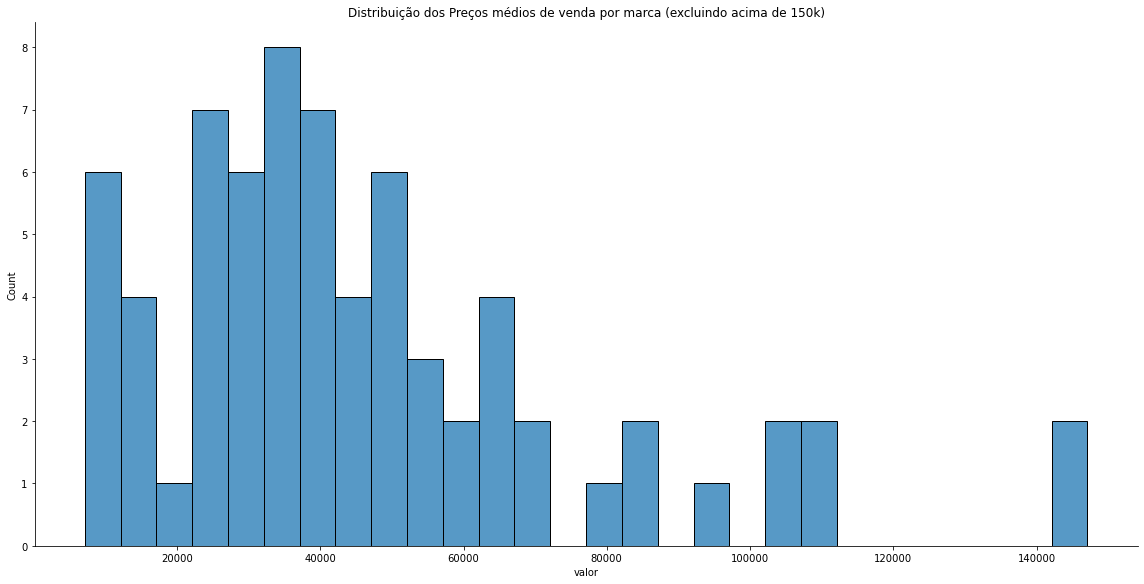

In [36]:
# plt.figure(figsize=(12,8))
sns.displot(fipe.groupby("marca").mean().valor[fipe.groupby("marca").mean().valor < 150000],
    height= 8, aspect= 2, binwidth = 5000)
plt.title("Distribuição dos Preços médios de venda por marca (excluindo acima de 150k)");

### ABC

In [37]:
ano2022 = fipe[(fipe.anoMod_flag == 0)&(fipe.anoModelo == 2022)].groupby("codigoFipe").describe()["valor"]

Text(0.5, 1.0, 'Preço de Venda de Carros Novos (anoModelo == 2022)')

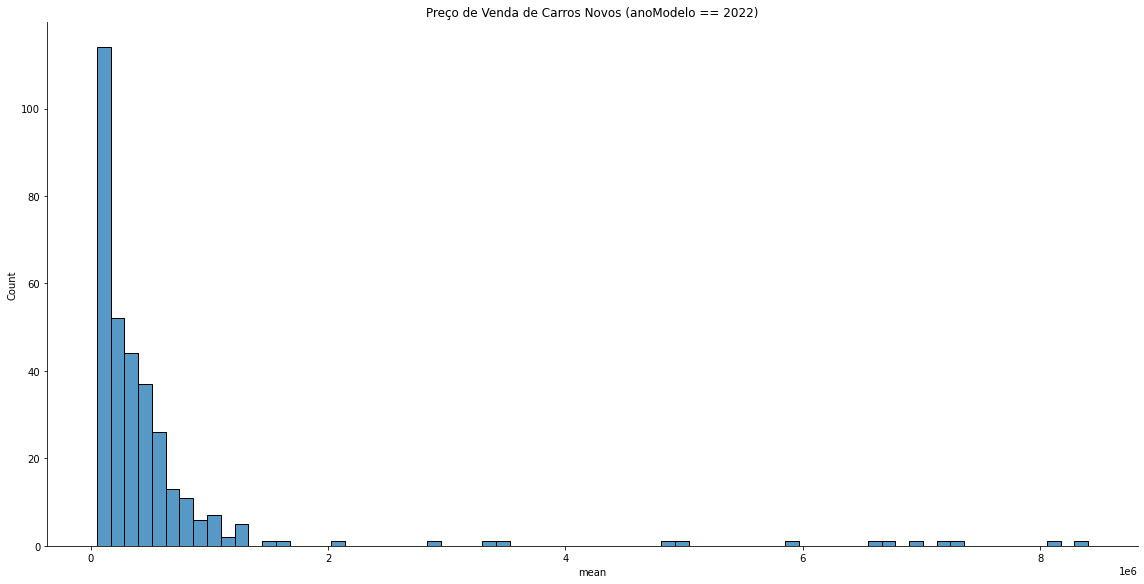

In [38]:

sns.displot(ano2022["mean"], height= 8 , aspect= 2)
plt.title("Preço de Venda de Carros Novos (anoModelo == 2022)");